# Visualization

The purpose of this notebook is to provide a simple way to visualize the results of the analysis.

In [87]:
scenariosToImport = [1, 2, 3, 4, 5, 6, 7]
casesToImport = [1]

scenariosToImport = [i-1 for i in scenariosToImport]
casesToImport = [i-1 for i in casesToImport]

timeLength = 70024

In [88]:
raw = []

for scenario in scenariosToImport:
    raw.append([])
    for case in casesToImport:
        fileName = "../../matlab_framework/sim/sim" + str(scenario+1) + "_case" + str(case+1) + ".txt"
        f = open(fileName, "r")
        raw[scenario].append(f.read())
        f.close()
        raw[scenario][case] = raw[scenario][case].split("\n")
        raw[scenario][case] = raw[scenario][case][2:]
        for i in range(len(raw[scenario][case])):
            raw[scenario][case][i] = raw[scenario][case][i].split(",")
            raw[scenario][case][i] = raw[scenario][case][i][:-1]
            for j in range(len(raw[scenario][case][i])):
                raw[scenario][case][i][j] = float(raw[scenario][case][i][j])

timeVector = []
for i in range(timeLength):
    timeVector.append(i/3600)

In [89]:
import matplotlib.pyplot as plt

In [96]:
casesToPlot = [1]
scenariosToPlot = [6, 7]

casesToPlot = [i-1 for i in casesToPlot]

scenariosToPlot = [[i, scenariosToPlot[i]-1] for i in range(len(scenariosToPlot))]

# different colors for different scenarios
colors = ["#9467bd", "#2ca02c", "#e377c2", "#ff7f0e", "#8c564b", "#d62728", "#7f7f7f"]
# different line styles for different scenarios
lineStyles = ["--", "-", "-.", ":", "--", ":", "-."]

In [97]:
for i, scenario in scenariosToPlot:
    for case in casesToPlot:
        PLoad = len(raw[scenario][case]) - 4
        Ph = len(raw[scenario][case]) - 3
        W = len(raw[scenario][case]) - 2
        for t in range(1, len(timeVector)):
            if scenario+1 == 4:
                if round(raw[scenario][case][W][t-1] * 1000) != round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000):
                    print(round(raw[scenario][case][W][t-1] * 1000), round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000), scenario+1, case+1, t)
            else:
                if round(raw[scenario][case][W][t-1] * 1000) < round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000):
                    print(round(raw[scenario][case][W][t-1] * 1000), round((raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]) * 1000), scenario+1, case+1, t)

In [92]:
import csv

n_of_deadlines = []

for i in range(1, 12):
    # import tasks from csv
    with open('tasks/tasks' + str(i) + '.csv', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        tasks_periods = []
        tasks_weights = []
        tasks_times = []
        x = 0
        # skip first row
        next(reader)
        for row in reader:
            tasks_periods.append(int(row[0]))
            tasks_weights.append(int(row[1]))
            tasks_times.append(int(row[2]))
            x += int(timeLength / int(row[0]))
        n_of_deadlines.append(x)
print(n_of_deadlines)


[5242, 4327, 4412, 4194, 5122, 5124, 4544, 4352, 4299, 3990, 201427]


1906
1961


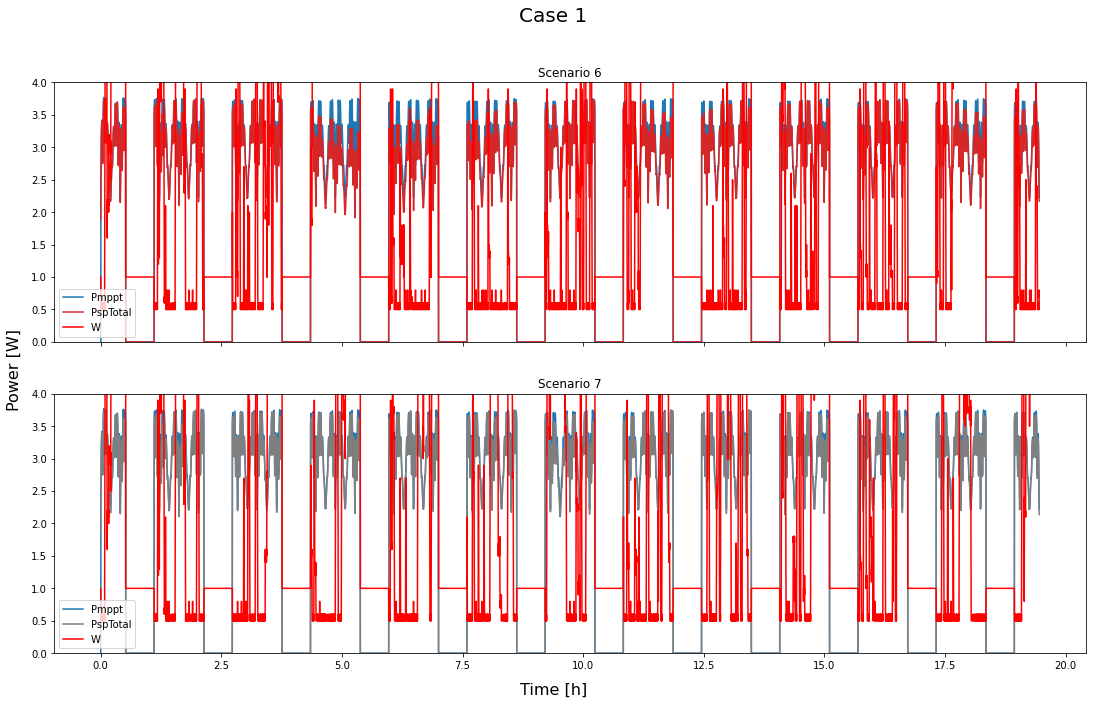

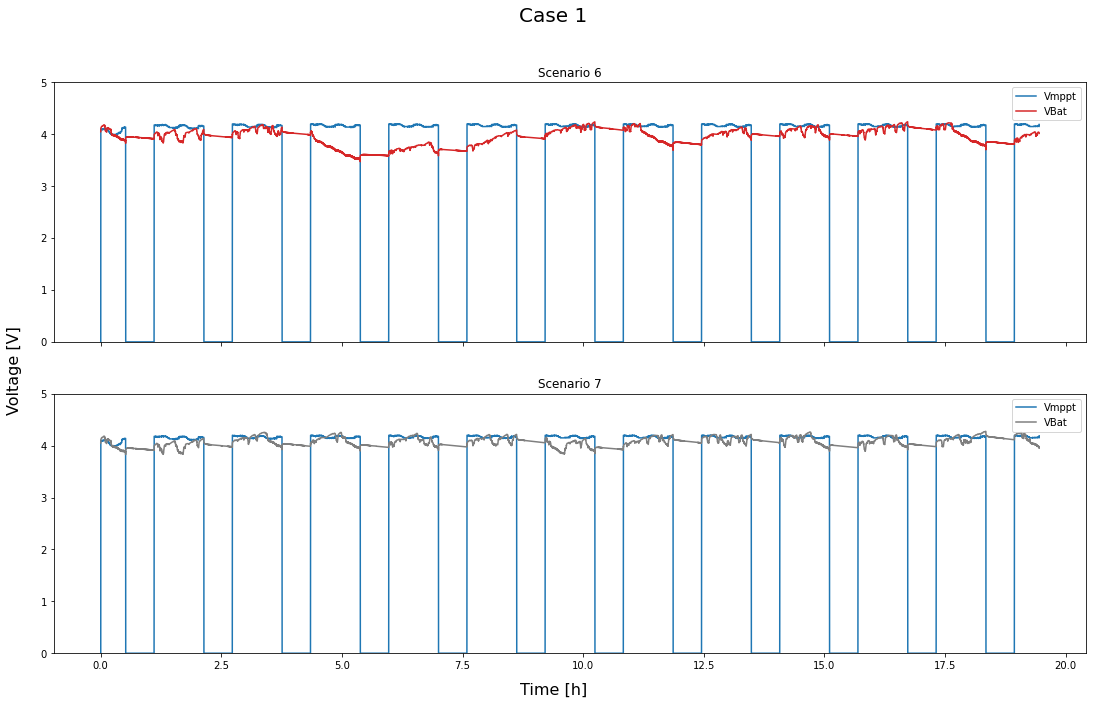

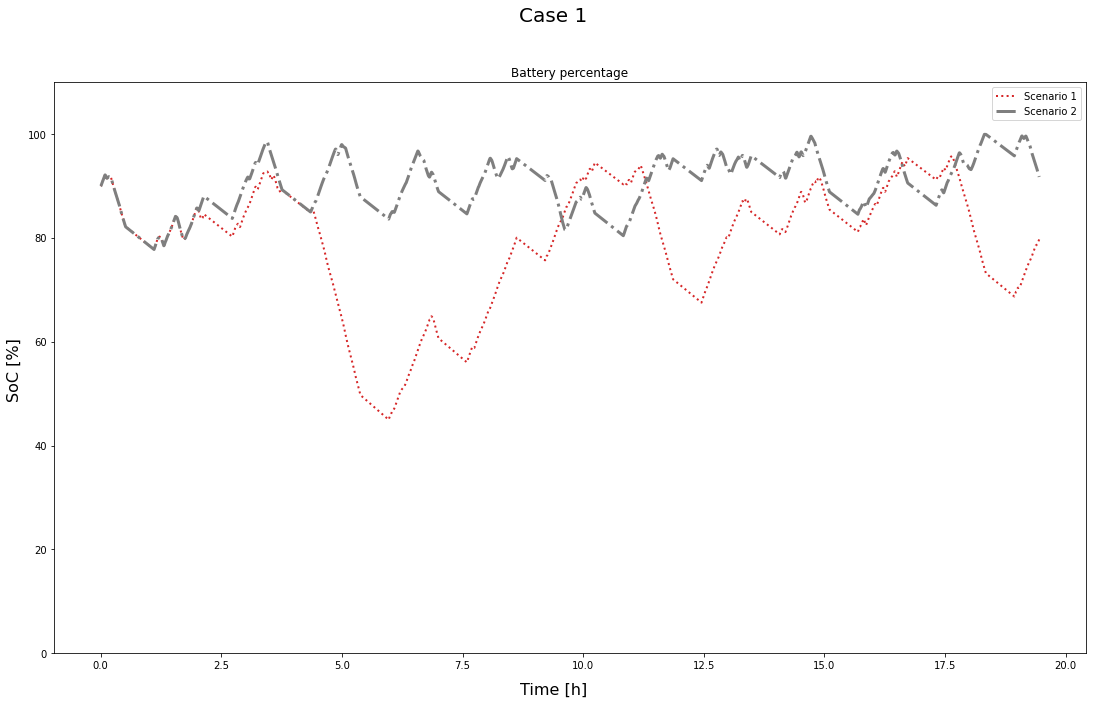

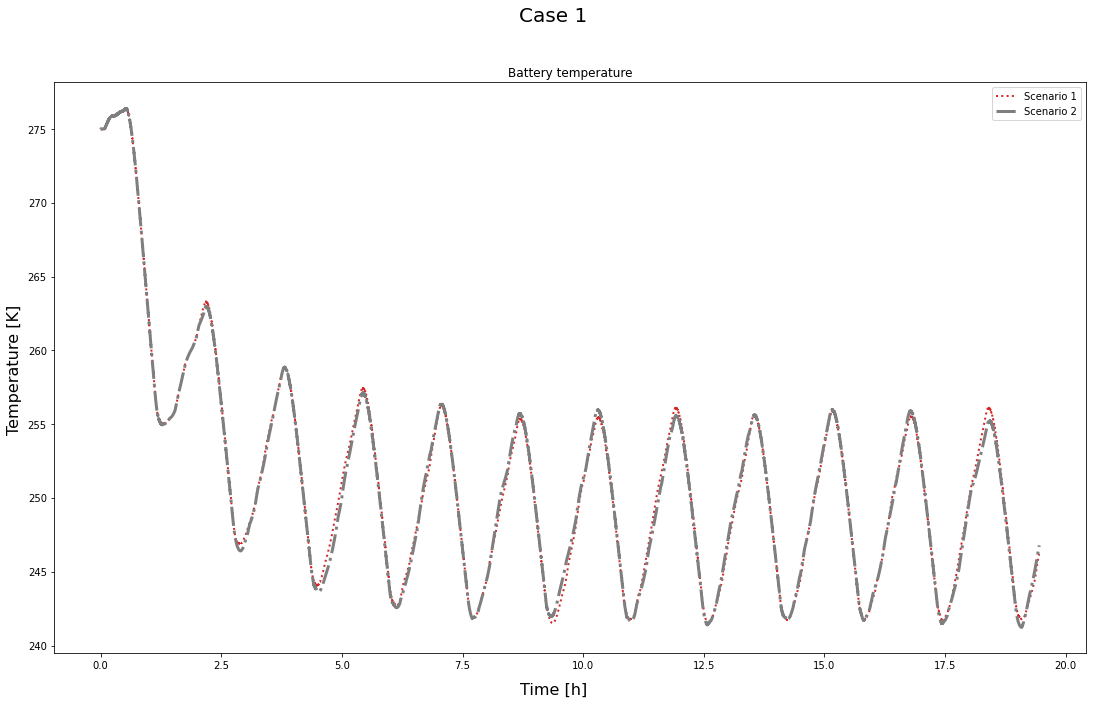

In [98]:
for case in casesToPlot:
    fig1, ax11 = plt.subplots(len(scenariosToPlot), 1, sharex=True)
    fig1.suptitle("Case " + str(case+1), fontsize=20)
    fig1.set_size_inches(18.5, 10.5)
    fig1.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig1.text(0.09, 0.5, 'Power [W]', va='center', rotation='vertical', fontsize=16)

    fig2, ax21 = plt.subplots(len(scenariosToPlot), 1, sharex=True)
    fig2.suptitle("Case " + str(case+1), fontsize=20)
    fig2.set_size_inches(18.5, 10.5)
    fig2.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig2.text(0.09, 0.5, 'Voltage [V]', va='center', rotation='vertical', fontsize=16)

    fig3, ax31 = plt.subplots()
    fig3.suptitle("Case " + str(case+1), fontsize=20)
    fig3.set_size_inches(18.5, 10.5)
    fig3.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig3.text(0.09, 0.5, 'SoC [%]', va='center', rotation='vertical', fontsize=16)

    fig4, ax41 = plt.subplots()
    fig4.suptitle("Case " + str(case+1), fontsize=20)
    fig4.set_size_inches(18.5, 10.5)
    fig4.text(0.5, 0.07, 'Time [h]', ha='center', fontsize=16)
    fig4.text(0.09, 0.5, 'Temperature [K]', va='center', rotation='vertical', fontsize=16)

    for i, scenario in scenariosToPlot:
        Pmppt = 0
        PspTotal = 1
        Vmppt = 2
        VBat = 3
        SoC = 4
        Dl_lost = 5
        tasks = range(6, len(raw[scenario][case]) - 4)
        PLoad = len(raw[scenario][case]) - 4
        Ph = len(raw[scenario][case]) - 3
        W = len(raw[scenario][case]) - 2
        TBat = len(raw[scenario][case]) - 1

        ax11[i].set_title("Scenario " + str(scenario+1))
        ax11[i].plot(timeVector, raw[scenario][case][Pmppt], label="Pmppt")
        ax11[i].plot(timeVector, raw[scenario][case][PspTotal], label="PspTotal", color=colors[scenario])
        ax11[i].plot(timeVector, raw[scenario][case][W], label="W", color='red')
        ax11[i].set_ylim([0, 4])
        ax11[i].legend()

        ax21[i].set_title("Scenario " + str(scenario+1))
        ax21[i].plot(timeVector, raw[scenario][case][Vmppt], label="Vmppt")
        ax21[i].plot(timeVector, raw[scenario][case][VBat], label="VBat", color=colors[scenario])
        ax21[i].set_ylim([0, 5])
        ax21[i].legend()

        SoC_vector = [i*100 for i in raw[scenario][case][SoC]]
        ax31.set_title("Battery percentage")
        ax31.plot(timeVector, SoC_vector, lineStyles[scenario], label="Scenario " + str(i+1), color=colors[scenario], linewidth=(((scenario+1)%3)+2))
        ax31.set_ylim([0, 110])
        ax31.legend()

        ax41.set_title("Battery temperature")
        ax41.plot(timeVector, raw[scenario][case][TBat], lineStyles[scenario], label="Scenario " + str(i+1), color=colors[scenario], linewidth=(((scenario+1)%3)+2))
        ax41.legend()

        print(int(raw[scenario][case][Dl_lost][-1]))

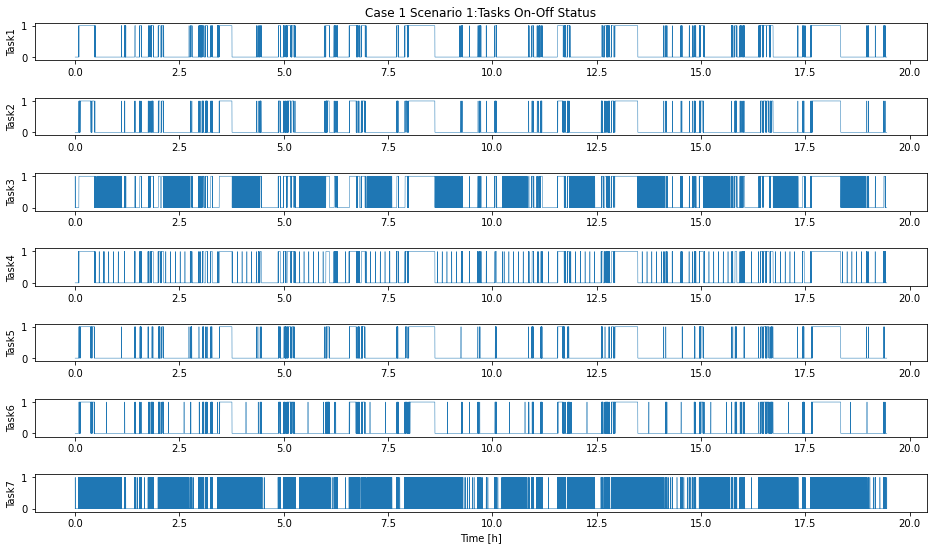

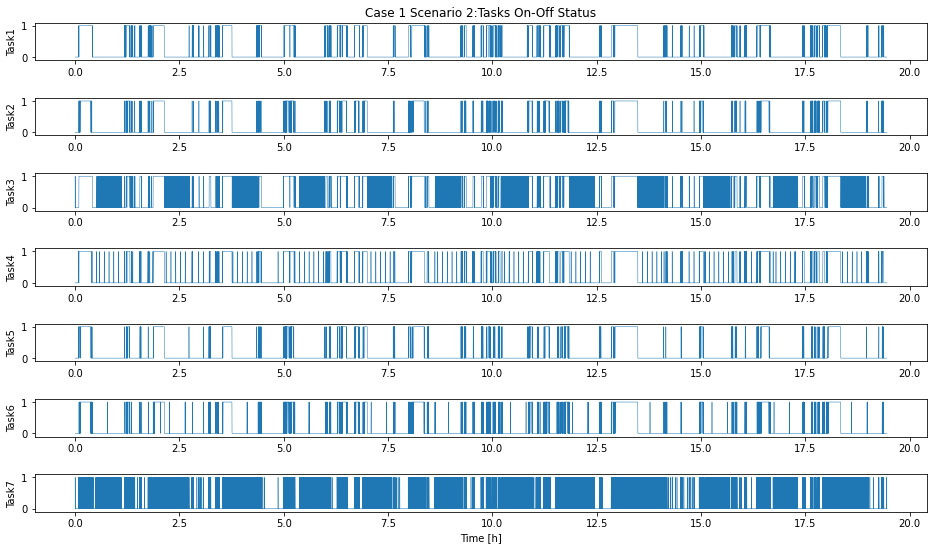

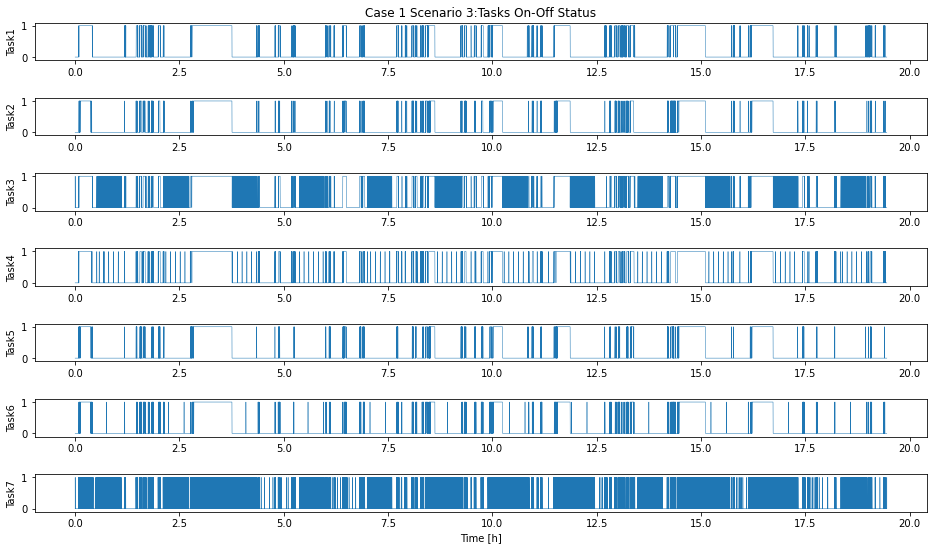

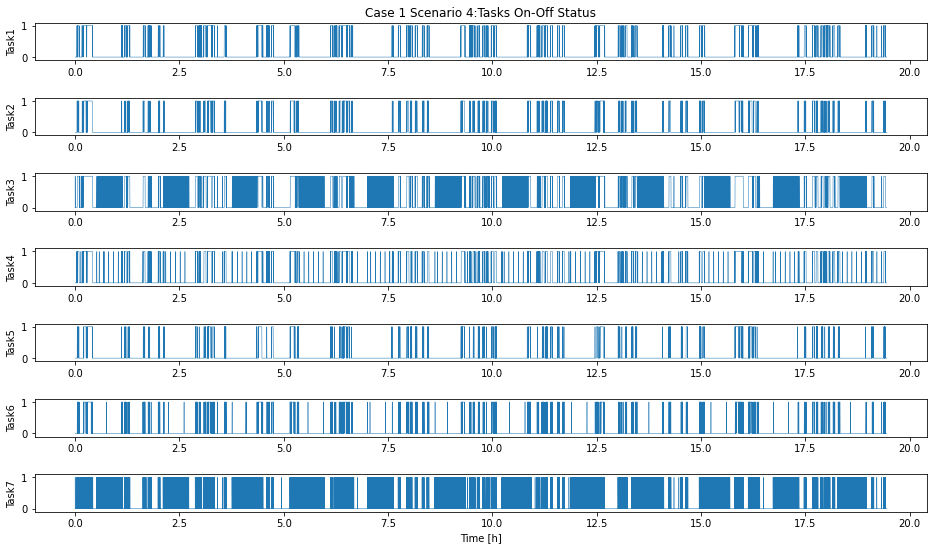

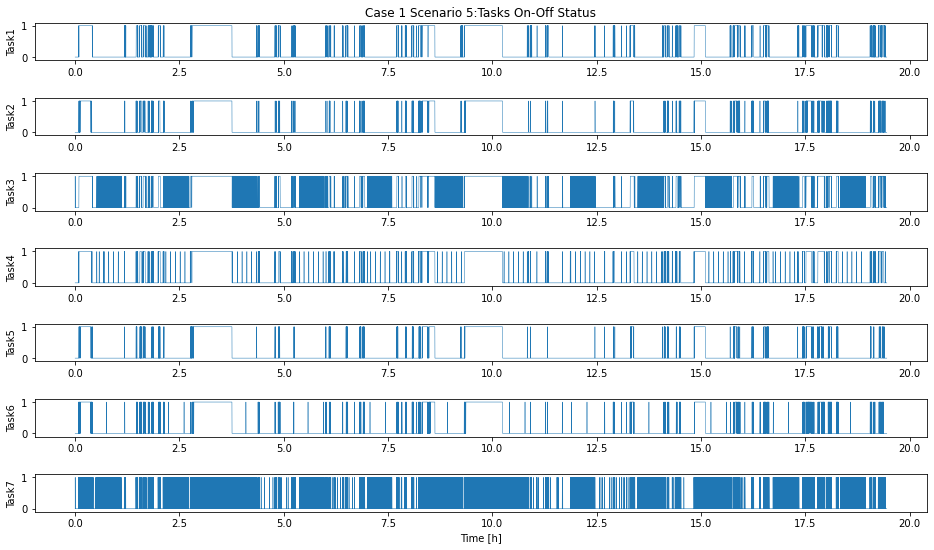

In [55]:
for case in casesToPlot:
    for i, scenario in scenariosToPlot:
        plt.figure(figsize =(16, 9))
        tasks = range(6, len(raw[scenario][case]) - 4)
        for task in tasks:
            y = task - 6
            plt.subplot(len(tasks), 1, y+1)
            plt.plot(timeVector, raw[scenario][case][tasks[y]], '-', linewidth=0.5)
        # Add labels
        plt.subplot(len(tasks), 1, 1)
        plt.title("Case " + str(case+1) + " Scenario " + str(scenario+1) + ":Tasks On-Off Status")
        for task in tasks:
            y = task - 6
            plt.subplot(len(tasks), 1, y+1)
            plt.ylabel('Task' + str(y+1))
            plt.ylim(-0.1, 1.1)
        plt.xlabel('Time [h]')
        # increase space between subplots
        plt.subplots_adjust(hspace=1.0)